# Signature Forgery detection

This assignment is to find ways we can identify whether an image is **real** or **forged**.

## MSE Approach

One way we can approach the problem is to find the **MSE** between 2 images. This will give us the similarity of the 2 images, the lower the MSE, the more similar it is. 

Before we proceed, as the dataset is already split into **train set** and **test set**, we do not have to further split them into train and test set. We will use the existing train and test set split in our detection. 

As the dataset is in the form of picture (.png), we have to find ways to convert them into statistical data so we can use the **MSE** approach. One of the ways is to convert the pictures into 2D array of RGB representing the pictures.



Text(0.5, 1.0, 'Signature with another signature')

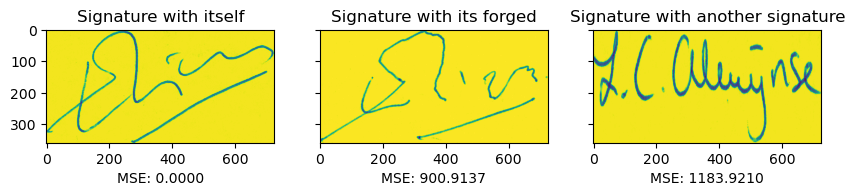

In [11]:
# Import libraries
import cv2 
import numpy as np
from matplotlib import pyplot as plt

from skimage.metrics import mean_squared_error

# Define folder structure as a constant
DATASET_FOLDER = "../Dataset"
TEST_SET_FOLDER = "/test"
TRAIN_SET_FOLDER = "/train"

# Define image dimension check and resize if not the same
def image_resize(imageA, imageB):
    if not (imageA.shape == imageB.shape):
        # Scale the smaller dimension pictures
        if (imageA.shape < imageB.shape):
            dim = (imageB.shape[1], imageB.shape[0])
            imageA = cv2.resize(imageA, dim)
        elif (imageB.shape < imageA.shape):
            dim = (imageA.shape[1], imageA.shape[0])
            imageB = cv2.resize(imageB, dim)
        
    return imageA, imageB


img_001_real = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/real/001/001_01.png', 0)
img_001_forged = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/forged/001_forg/001_forg_01.png',0)

# Resize the images if they are not the same
img_001_real , img_001_forged=  image_resize(img_001_real,img_001_forged)

# Setting up plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4), sharex=True, sharey=True)
ax = axes.ravel()



# Calculate MSE of signature 1 and itself
MSE = mean_squared_error(img_001_real,img_001_real)
ax[0].imshow(img_001_real)
ax[0].set_xlabel(f'MSE: {MSE:.4f}')
ax[0].set_title('Signature with itself')


# Calculate MSE of signature 1 and its forged
MSE = mean_squared_error(img_001_real,img_001_forged)
ax[1].imshow(img_001_forged)
ax[1].set_xlabel(f'MSE: {MSE:.4f}')
ax[1].set_title('Signature with its forged')

img_002_real = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/real/002/002_02.png',0)
img_001_real , img_002_real=  image_resize(img_001_real,img_002_real)

# Calculate MSE of signature 1 and signature 2
MSE = mean_squared_error(img_001_real,img_002_real)
ax[2].imshow(img_002_real)
ax[2].set_xlabel(f'MSE: {MSE:.4f}')
ax[2].set_title('Signature with another signature')


As shown above, we can see that the MSE of real and forged is below **1000** whereas MSE of image1 and image2 has a MSE of above **1000**. Additionally, MSE of **0** implies the images are identical.

Using MSE as an approach to identify forgery is not an ideal solution as MSE **below 1000** should be considered as *similar/genuine* but in our case forged signature is considered genuine - hence a **false positive** result.

We have to find another approach of finding similarity of images, which we have taken **SSIM** as another approach.

## SSIM Approach

**SSIM**, stands for **Structural Similarity Index**,  is another method to find similarity between 2 images. It works somewhat similar to MSE but it is more in depth in which it consider other areas as well. 

There is a library for SSIM which is by skimage. We will use the library.

Text(0.5, 1.0, 'Signature with another signature')

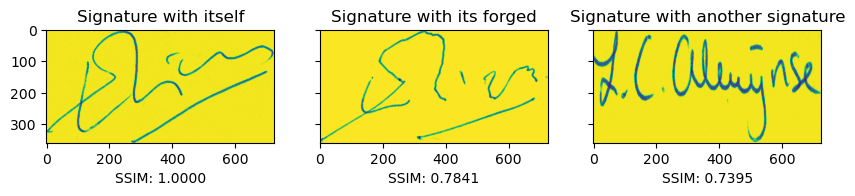

In [12]:
from skimage.metrics import structural_similarity as ssim


img_001_real = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/real/001/001_01.png', 0)
img_001_forged = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/forged/001_forg/001_forg_01.png',0)


# Resize the images if they are not the same
img_001_real , img_001_forged=  image_resize(img_001_real,img_001_forged)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4), sharex=True, sharey=True)
ax = axes.ravel()


# Calculate MSE of signature 1 and itself
SSIM = ssim(img_001_real,img_001_real)
ax[0].imshow(img_001_real)
ax[0].set_xlabel(f'SSIM: {SSIM:.4f}')
ax[0].set_title('Signature with itself')


# Calculate SSIM of signature 1 and its forged
SSIM = ssim(img_001_real, img_001_forged)
ax[1].imshow(img_001_forged)
ax[1].set_xlabel(f'SSIM: {SSIM:.4f}')
ax[1].set_title('Signature with its forged')


img_002_real = cv2.imread(DATASET_FOLDER + TRAIN_SET_FOLDER + '/real/002/002_02.png',0)
img_001_real , img_002_real=  image_resize(img_001_real,img_002_real)

# Calculate SSIM of signature 1 and signature 2
SSIM = ssim(img_001_real,img_002_real)
ax[2].imshow(img_002_real)
ax[2].set_xlabel(f'SSIM: {SSIM:.4f}')
ax[2].set_title('Signature with another signature')


The value of SSIM ranges from 0 to 1, 0 means it is totally different image whereas 1 means it is totally identical. Hence, the higher the value of SSIM, the more identical the images are.